In [2]:
#NOte
#1.Will apply simple linear regression here 
#2. Open will be out independnt and close will be out dependednt value

## 01. importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn  import metrics

## 02.reading file

In [5]:
df = pd.read_csv('Nifty50.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df = df[['Open','High','Low','Close']]
df


,Open,High,Low,Close
Date,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805
...,...,...,...,...
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000


In [6]:
df.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3828 entries, 2007-09-17 to 2023-05-03
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3828 non-null   float64
 1   High    3828 non-null   float64
 2   Low     3828 non-null   float64
 3   Close   3828 non-null   float64
dtypes: float64(4)
memory usage: 149.5 KB


<Axes: xlabel='Date'>

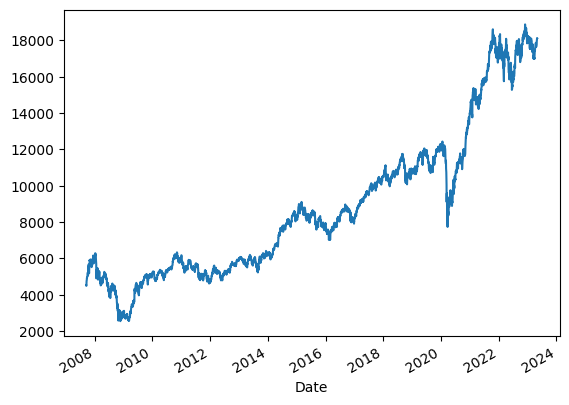

In [8]:
df['Open'].plot()

##  03.Setting input and target variable 

In [10]:
X =df['Open']
X

Date
2007-09-17     4518.450195
2007-09-18     4494.100098
2007-09-19     4550.250000
2007-09-20     4734.850098
2007-09-21     4752.950195
                  ...     
2023-04-26    17767.300781
2023-04-27    17813.099609
2023-04-28    17950.400391
2023-05-02    18124.800781
2023-05-03    18113.800781
Name: Open, Length: 3828, dtype: float64

In [12]:
y = df['Close']
y

Date
2007-09-17     4494.649902
2007-09-18     4546.200195
2007-09-19     4732.350098
2007-09-20     4747.549805
2007-09-21     4837.549805
                  ...     
2023-04-26    17813.599609
2023-04-27    17915.050781
2023-04-28    18065.000000
2023-05-02    18147.650391
2023-05-03    18089.849609
Name: Close, Length: 3828, dtype: float64

##  04.Train test split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2  ,random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3062,)
(766,)
(3062,)
(766,)


In [18]:
766/(766+3062)

0.2001044932079415

## 05.fitting the mdoel

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [32]:
X_train = X_train.values.reshape(-1,1)

In [33]:
y_train = y_train.values.reshape(-1,1)

In [34]:
model.fit(X_train,y_train)

LinearRegression()